<a href="https://colab.research.google.com/github/MD-Ryhan/THREATENING_TEXT_DETECTION_USING_CNN_LSTM_BILSTM_XLMROBERTA/blob/main/XlmRoberta%2BBaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hide Cell - Old Method**

In [ ]:
# !pip install transformers==4.28.0

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf

# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from transformers import XLMRobertaTokenizer, XLMRobertaModel, AdamW, get_linear_schedule_with_warmup
# import torch
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from gensim.models import Word2Vec
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional, Dense
# from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
# from tensorflow.keras.metrics import Metric
# from sklearn.metrics import confusion_matrix, f1_score
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# # Load the training and test data from Excel files
# train_data = pd.read_excel('orgurtrain.xlsx')
# test_data = pd.read_excel('orgurtest.xlsx')

# # Split the data into features (X) and labels (y)
# X_train = train_data['Tweets'].tolist()
# y_train = train_data['label'].tolist()
# X_test = test_data['Tweets'].tolist()
# y_test = test_data['label'].tolist()


In [ ]:
# # Hyperparameters
# sequence_length = 128
# batch_size = 32
# learning_rate = 1e-5
# hidden_dropout = 0.05
# warmup_ratio = 0.06
# weight_decay = 0.01
# epochs = 10


In [ ]:
# # Load XLM-RoBERTa model and tokenizer
# model_name = 'xlm-roberta-base'
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
# model = XLMRobertaModel.from_pretrained(model_name)

In [ ]:
# # Tokenize and encode the training data
# X_train_encoded = tokenizer.batch_encode_plus(
#     X_train,
#     truncation=True,
#     padding='max_length',
#     max_length=sequence_length,
#     return_tensors='pt'
# )

# # Tokenize and encode the test data
# X_test_encoded = tokenizer.batch_encode_plus(
#     X_test,
#     truncation=True,
#     padding='max_length',
#     max_length=sequence_length,
#     return_tensors='pt'
# )


In [ ]:
# # Get the input IDs and attention masks for training data
# X_train_input_ids = X_train_encoded['input_ids']
# X_train_attention_mask = X_train_encoded['attention_mask']

# # Get the input IDs and attention masks for test data
# X_test_input_ids = X_test_encoded['input_ids']
# X_test_attention_mask = X_test_encoded['attention_mask']


In [ ]:
# # Get the last hidden states from the BERT encoder
# last_hidden_states_train = model(X_train_input_ids)[0]
# last_hidden_states_test = model(X_test_input_ids)[0]

In [ ]:
# # Obtain the embeddings from XLM-RoBERTa for training data
# with torch.no_grad():
#     X_train_embeddings = model(input_ids=X_train_input_ids, attention_mask=X_train_attention_mask).last_hidden_state[:, 0, :].numpy()

# # Obtain the embeddings from XLM-RoBERTa for test data
# with torch.no_grad():
#     X_test_embeddings = model(input_ids=X_test_input_ids, attention_mask=X_test_attention_mask).last_hidden_state[:, 0, :].numpy()


In [ ]:
# # Train SVM classifier
# svm_model = SVC(C=100, kernel='rbf')
# svm_model.fit(X_train_embeddings, y_train)


SVC(C=100)

In [ ]:
# # Predict using SVM classifier
# svm_predictions = svm_model.predict(X_test_embeddings)

# # Calculate accuracy
# svm_accuracy = accuracy_score(y_test, svm_predictions)
# print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.862934362934363


**New Method**

In [ ]:
pip install "transformers ==4.16.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 61.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=747feb24a6f385e4317733ac6d22121d69848f4427ce22dfb2310a6b7746c1aa
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [ ]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=0c85feb384504b06c5434b4b6533462956490f16c5248b1c90152f34dd392b4f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 910.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d93be333266ffeb0844aedcb2c11a7fe63d3740c32d8b3f82d3374c6f3fde246
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import re
import string
import pandas as pd
from tqdm.auto import tqdm
import tensorflow as tf
import numpy as np
import time
import datetime
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
import random
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import  TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pymorphy2
import keras
from keras import layers
from keras import optimizers
from keras import backend as K
from tensorflow.keras import metrics
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
import itertools
import gensim
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec

In [ ]:
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
def printResult(y_pred, y_prob):
    acc = accuracy_score(df_test["label"], y_pred)
    f1 = f1_score(df_test["label"],  y_pred)
    # Result
    print("F1 Score: {:.2f}".format(f1*100),end='\n\n')
    print("Accuracy: {:.2f}".format(acc*100),end='\n\n')
    cm = confusion_matrix(df_test["label"],y_pred)
    print('Confusion Matrix:\n', cm)
    print(classification_report(df_test["label"],y_pred))

    # Plot
    fpr, tpr, thresholds = roc_curve(df_test["label"], y_prob)
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='lower right')


In [ ]:
from tensorflow.keras.metrics import Metric

# Custom metric for F1 score
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(tf.math.round(y_pred), tf.float32)
        self.true_positives.assign_add(tf.reduce_sum(y_true * y_pred))
        self.false_positives.assign_add(tf.reduce_sum((1 - y_true) * y_pred))
        self.false_negatives.assign_add(tf.reduce_sum(y_true * (1 - y_pred)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

In [ ]:
def create_model():
  model=Sequential()
  model.add(Conv1D(kernel_size=5, filters=128))
  model.add(MaxPooling1D())
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',F1Score(),keras.metrics.Precision(), keras.metrics.Recall(),
                                                                       keras.metrics.TruePositives(), keras.metrics.TrueNegatives(),
                                                                       keras.metrics.FalsePositives(), metrics.FalseNegatives()])

  return model


In [ ]:
def mean(z):
    return sum(itertools.chain(z))/len(z)

def embeddToBERT(text):
    sentences = re.split('!|\?|\.',text)
    sentences = list(filter(None, sentences))

    result = bert_transformers.encode(sentences)
    feature = [mean(x) for x in zip(*result)]

    return feature


In [ ]:
bert_transformers = SentenceTransformer('Hate-speech-CNERG/urdu-abusive-MuRIL')
# bert_transformers = SentenceTransformer('urduhack/roberta-urdu-small')
bert_transformers.max_seq_length = 128

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/Hate-speech-CNERG_urdu-abusive-MuRIL were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
df_train = pd.read_excel('/content/train_fold_10.xlsx')
df_train['text'] = df_train['text']


df_test = pd.read_excel('/content/val_fold_10.xlsx')
df_test['text'] = df_test['text']


In [ ]:
bert_sentence_training_features = df_train['text'].apply(embeddToBERT)
bert_sentence_test_features = df_test['text'].apply(embeddToBERT)

In [ ]:
feature = [x for x in bert_sentence_training_features.transpose()]
bert_sentence_training_features = np.asarray(feature)

feature = [x for x in bert_sentence_test_features.transpose()]
bert_sentence_test_features = np.asarray(feature)

print(bert_sentence_training_features.shape)


(4324, 768)


In [ ]:
embed_num, embed_dim = bert_sentence_training_features.shape

In [ ]:
def create_arr(sent):
  arr = []
  for el in sent:
    if len(el)!=768:
      arr.append(np.zeros(768, dtype=int))
    else:
      arr.append(np.array(el))
  return np.array(arr)


In [ ]:
train = create_arr(bert_sentence_training_features)
test = create_arr(bert_sentence_test_features)

In [ ]:
model = SVC(probability=True, C=100) #class_weight='balanced'
model.fit(train, df_train["label"])


SVC(C=100, probability=True)

F1 Score: 80.25

Accuracy: 81.53

Confusion Matrix:
 [[669  91]
 [190 571]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       760
           1       0.86      0.75      0.80       761

    accuracy                           0.82      1521
   macro avg       0.82      0.82      0.81      1521
weighted avg       0.82      0.82      0.81      1521

Area under the ROC curve : 0.895977


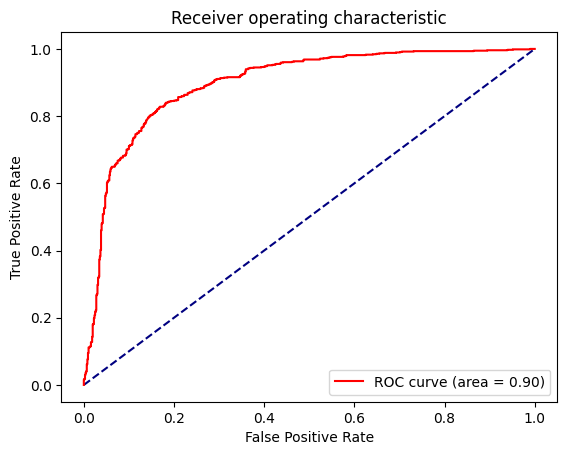

In [ ]:
y_pred_svm = model.predict(test)
y_prob_svm = model.predict_proba(test)[:,1]
printResult(y_pred_svm, y_prob_svm)

In [ ]:
model = RandomForestClassifier(random_state=42,n_jobs=-1)
model.fit(train, df_train["label"])

RandomForestClassifier(n_jobs=-1, random_state=42)

F1 Score: 79.84

Accuracy: 80.60

Confusion Matrix:
 [[642 118]
 [177 584]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       760
           1       0.83      0.77      0.80       761

    accuracy                           0.81      1521
   macro avg       0.81      0.81      0.81      1521
weighted avg       0.81      0.81      0.81      1521

Area under the ROC curve : 0.883392


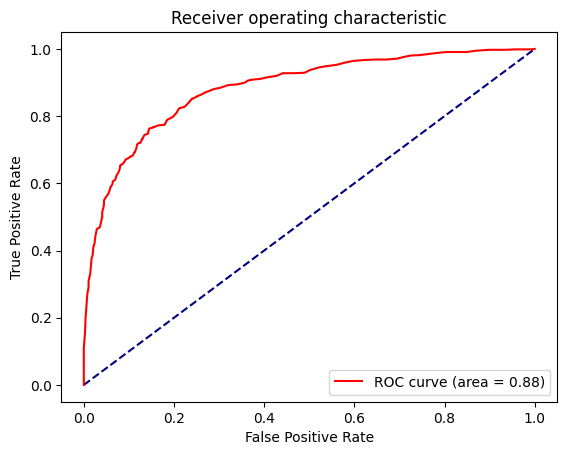

In [ ]:
y_pred_rf = model.predict(test)
y_prob_rf = model.predict_proba(test)[:,1]
printResult(y_pred_rf, y_prob_rf)

In [ ]:
y_pred_rf

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr_model = LogisticRegression(solver = 'saga') #class_weight='balanced'
lr_model.fit(train, df_train["label"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

F1 Score: 78.01

Accuracy: 77.91

Confusion Matrix:
 [[589 171]
 [165 596]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       760
           1       0.78      0.78      0.78       761

    accuracy                           0.78      1521
   macro avg       0.78      0.78      0.78      1521
weighted avg       0.78      0.78      0.78      1521

Area under the ROC curve : 0.868869


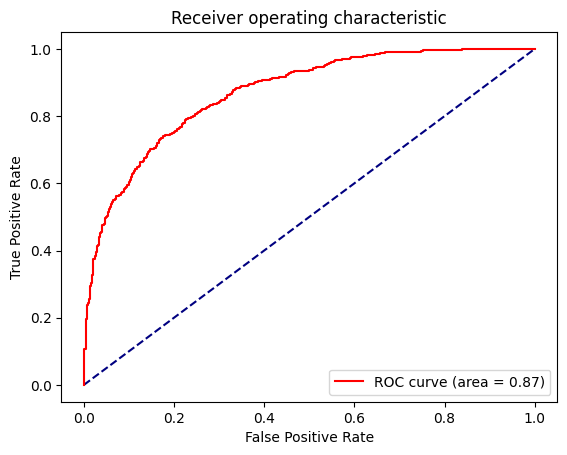

In [ ]:
y_pred_lr = lr_model.predict(test)
y_prob_lr = lr_model.predict_proba(test)[:,1]
printResult(y_pred_lr, y_prob_lr)

In [ ]:
train = (train.reshape(train.shape[0], train.shape[1],1))
test = (test.reshape(test.shape[0], test.shape[1],1))


In [ ]:
model = create_model()

In [ ]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(df_train["label"].values),
                                        y = df_train["label"].values
                                    )
class_weights = dict(zip(np.unique(df_train["label"].values), class_weights))
class_weights

{0: 1.001280175566935, 1: 0.998723093761401}

In [ ]:
from sklearn.utils import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=df_test["label"].values)

In [ ]:
history = model.fit(train, df_train["label"].values,
                    epochs=10,
                    batch_size=32,
                    validation_data=(test, df_test["label"].values)) #class_weight=class_weights


Epoch 1/10
136/136 [==============================] - 10s 61ms/step - loss: 0.6926 - accuracy: 0.5164 - f1_score: 0.5083 - precision_1: 0.5170 - recall_1: 0.5000 - true_positives_1: 1081.0000 - true_negatives_1: 1152.0000 - false_positives_1: 1010.0000 - false_negatives_1: 1081.0000 - val_loss: 0.7210 - val_accuracy: 0.5208 - val_f1_score: 0.1606 - val_precision_1: 0.6471 - val_recall_1: 0.0917 - val_true_positives_1: 22.0000 - val_true_negatives_1: 228.0000 - val_false_positives_1: 12.0000 - val_false_negatives_1: 218.0000
Epoch 2/10
136/136 [==============================] - 9s 68ms/step - loss: 0.6950 - accuracy: 0.5187 - f1_score: 0.5004 - precision_1: 0.5202 - recall_1: 0.4820 - true_positives_1: 1042.0000 - true_negatives_1: 1201.0000 - false_positives_1: 961.0000 - false_negatives_1: 1120.0000 - val_loss: 0.6885 - val_accuracy: 0.5000 - val_f1_score: 0.6667 - val_precision_1: 0.5000 - val_recall_1: 1.0000 - val_true_positives_1: 240.0000 - val_true_negatives_1: 0.0000e+00 - val_

In [ ]:
model.evaluate(test, df_test["label"].values) #,sample_weight=sample_weights

15/15 [==============================] - 0s 10ms/step - loss: 0.6758 - accuracy: 0.6542 - f1_score: 0.7025 - precision_1: 0.6164 - recall_1: 0.8167 - true_positives_1: 196.0000 - true_negatives_1: 118.0000 - false_positives_1: 122.0000 - false_negatives_1: 44.0000


[0.6758310198783875,
 0.6541666388511658,
 0.7025088667869568,
 0.6163522005081177,
 0.8166666626930237,
 196.0,
 118.0,
 122.0,
 44.0]

48/48 [==============================] - 0s 10ms/step
F1 Score: 79.59

Accuracy: 80.21

Confusion Matrix:
 [[633 127]
 [174 587]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       760
           1       0.82      0.77      0.80       761

    accuracy                           0.80      1521
   macro avg       0.80      0.80      0.80      1521
weighted avg       0.80      0.80      0.80      1521

Area under the ROC curve : 0.878771


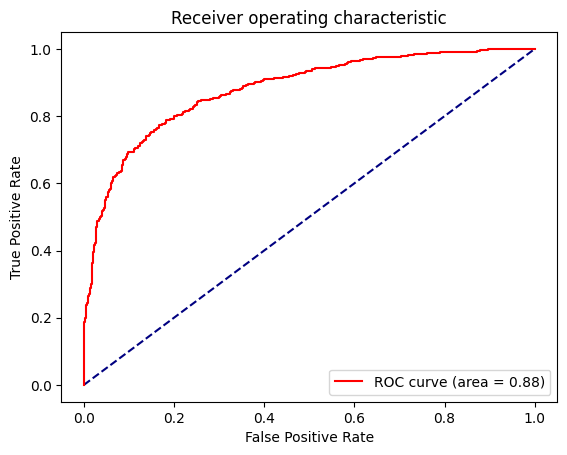

In [ ]:
y_prob_rf = model.predict(test)
y_pred = np.where(y_prob_rf > 0.5, 1, 0)
printResult(y_pred, y_prob_rf)

In [ ]:
y_pred = y_pred.flatten()

In [ ]:
import pandas as pd
y_test = df_test["label"].tolist()
# Assuming you have your data ready, let's create the necessary lists.
true_labels = y_test  # List of true labels
classifier_name = 'MuRIL_CNN'  # Name of the classifier you used
predicted_labels = y_pred  # List of predicted labels

# Generate instance IDs based on the length of true_labels.
instance_ids = [f'{i}' for i in range(1, len(true_labels) + 1)]

# Create a dictionary with the data.
data = {
    'Instance ID': instance_ids,
    'classifier': [classifier_name] * len(instance_ids),
    'true_label': true_labels,
    'pred_label': predicted_labels
}

# Create a DataFrame from the dictionary.
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file.
df.to_csv('MuRIL_CNN.csv', index=False)

# Print the first few rows of the DataFrame to verify the content.
print(df.head())

  Instance ID classifier  true_label  pred_label
0           1  MuRIL_CNN           0           0
1           2  MuRIL_CNN           1           1
2           3  MuRIL_CNN           0           0
3           4  MuRIL_CNN           1           0
4           5  MuRIL_CNN           1           1


In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional, Dense
# LSTM
def bilstm_model():
  bilstm_model = Sequential()
  bilstm_model.add(Bidirectional(LSTM(20)))
  bilstm_model.add(tf.keras.layers.Dropout(.5)) #to prevent overfitting
  bilstm_model.add(Dense(100, activation='relu'))
  bilstm_model.add(Dense(1, activation='sigmoid'))

  bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',F1Score(),keras.metrics.Precision(), keras.metrics.Recall(),
                                                                       keras.metrics.TruePositives(), keras.metrics.TrueNegatives(),
                                                                       keras.metrics.FalsePositives(), metrics.FalseNegatives()])

  return bilstm_model

In [ ]:
bilstm_model = bilstm_model()

In [ ]:
history = bilstm_model.fit(train, df_train["label"].values,class_weight=class_weights,
                    epochs=10,
                    batch_size=32,
                    validation_data=(test, df_test["label"].values))

Epoch 1/10
57/57 [==============================] - 37s 534ms/step - loss: 0.6848 - accuracy: 0.5669 - f1_score: 0.6381 - precision_1: 0.7820 - recall_1: 0.5389 - true_positives_1: 685.0000 - true_negatives_1: 332.0000 - false_positives_1: 191.0000 - false_negatives_1: 586.0000 - val_loss: 0.6725 - val_accuracy: 0.6132 - val_f1_score: 0.6922 - val_precision_1: 0.7949 - val_recall_1: 0.6130 - val_true_positives_1: 217.0000 - val_true_negatives_1: 89.0000 - val_false_positives_1: 56.0000 - val_false_negatives_1: 137.0000
Epoch 2/10
57/57 [==============================] - 29s 514ms/step - loss: 0.6697 - accuracy: 0.5847 - f1_score: 0.6565 - precision_1: 0.7929 - recall_1: 0.5602 - true_positives_1: 712.0000 - true_negatives_1: 337.0000 - false_positives_1: 186.0000 - false_negatives_1: 559.0000 - val_loss: 0.6654 - val_accuracy: 0.5912 - val_f1_score: 0.6678 - val_precision_1: 0.7885 - val_recall_1: 0.5791 - val_true_positives_1: 205.0000 - val_true_negatives_1: 90.0000 - val_false_posit

In [ ]:
bilstm_model.evaluate(test, df_test["label"].values, sample_weight=sample_weights)

16/16 [==============================] - 3s 95ms/step - loss: 0.6397 - accuracy: 0.6333 - f1_score: 0.7180 - precision_1: 0.7898 - recall_1: 0.6582 - true_positives_1: 233.0000 - true_negatives_1: 83.0000 - false_positives_1: 62.0000 - false_negatives_1: 121.0000


[0.6397001147270203,
 0.6332665085792542,
 0.7180277109146118,
 0.7898305058479309,
 0.6581920981407166,
 233.0,
 83.0,
 62.0,
 121.0]

16/16 [==============================] - 2s 90ms/step
F1 Score: 71.80

Accuracy: 63.33

Confusion Matrix:
 [[ 83  62]
 [121 233]]
              precision    recall  f1-score   support

           0       0.41      0.57      0.48       145
           1       0.79      0.66      0.72       354

    accuracy                           0.63       499
   macro avg       0.60      0.62      0.60       499
weighted avg       0.68      0.63      0.65       499

Area under the ROC curve : 0.681492


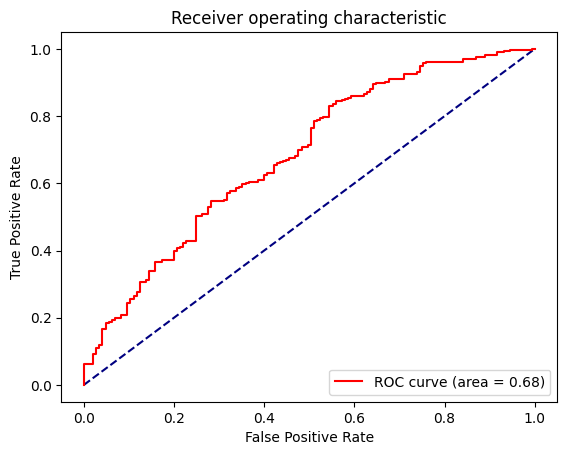

In [ ]:
y_prob_rf = bilstm_model.predict(test)
y_pred = np.where(y_prob_rf > 0.5, 1, 0)
printResult(y_pred, y_prob_rf)